# <font color='red'> Regression

### Dataset: Description and Details

**Link**: *https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset*

**Description:** Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Initial Analysis:** Dataset is supposed to have few missing values and some pre-processed columns. These columns will first be converted to view their original data and processed as per teachings of the course.

**Project Objective:** Data has attributes like season, year, month, hour, holiday, weekday, working day, weather situation, temperature, humidity, windspeed. These features might correspond to total rental bikes. Our objective is to:
* Initializations: Process data correctly to reflect right data impute missing values if required
* Preprocessing: Preprocess data for our machine learning models
* Data Visualization
* Apply ML Regression Models:
    1. KNN regressor
    2. Linear regression
    3. Ridge
    4. Lasso
    5. Polynomial regression
    6. SVM (simple, rbf, poly, linear)
* Grid Search for best parameters
* Cross-Validaiton to find average training and test scores
* Best Regressor with best parameters

### Initializations: Packages import and Data Read

In [141]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
##data read
bike_df = pd.read_csv("hour.csv")

In [143]:
##process data to show right data
bike_df = bike_df.rename(columns = {'weathersit':'weather', 'cnt':'count','mnth':'month','temp':'temperature','hum':'humidity'})
bike_df['season'] = bike_df['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
bike_df['yr'] = bike_df['yr'].map({0:'2011', 1:'2012'})
bike_df['holiday'] = bike_df['holiday'].map({0:'No', 1:'Yes'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
bike_df['workingday'] = bike_df['workingday'].map({0:'No', 1:'Yes'})
bike_df['weather'] = bike_df['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})

In [144]:
#bike_df.shape               # column row count
bike_df.head()              # data peak
#bike_df.describe()          # statistic details
#bike_df.info()              # column list
#bike_df.isna().any()        # check NA

,instant,dteday,season,yr,month,hr,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


### Initializations: Add Missing Values

In [145]:
##add missing values
#select 5% of total
miss_count = round(len(bike_df['instant']) * 0.05)
#add nans to temperature
miss_index1 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index1:
    bike_df.at[value,'temperature'] = np.nan
#add nans to humidity
miss_index2 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index2:
    bike_df.at[value,'humidity'] = np.nan
#add nans to windspeed 
miss_index3 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index3:
    bike_df.at[value,'windspeed'] = np.nan

In [146]:
#len(bike_df['instant'])                           # total columns count
#miss_count                                        # 5% of total
#miss_index1.head()                                # values in series of random indexes
#len(miss_index1)                                  # cross check length of series
#miss_index2.head()                                # values in series of random indexes
#len(miss_index2)                                  # cross check length of series
#miss_index3.head()                                # values in series of random indexes
#len(miss_index3)                                  # cross check length of series
bike_df.info()                                    # column list
#bike_df.isna().any()                              # check NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant        17379 non-null int64
dteday         17379 non-null object
season         17379 non-null object
yr             17379 non-null object
month          17379 non-null int64
hr             17379 non-null int64
holiday        17379 non-null object
weekday        17379 non-null object
workingday     17379 non-null object
weather        17379 non-null object
temperature    16526 non-null float64
atemp          17379 non-null float64
humidity       16532 non-null float64
windspeed      16531 non-null float64
casual         17379 non-null int64
registered     17379 non-null int64
count          17379 non-null int64
dtypes: float64(4), int64(6), object(7)
memory usage: 2.3+ MB


### Preprocessing: Sample and Column Selection

In [147]:
# select random smaller sample
bike_sample = bike_df.sample(frac=.1, random_state=3)               # 10% sample

# select random smaller sample
#bike_sample = bike_df.query('season == "Winter"')                   # filter by season
#bike_sample = bike_sample.sample(frac=.25, random_state=3)          # 25% sample

# drop columns
bike_sample = bike_sample.drop(columns=['instant','dteday'])        # non-numeric non-categoric
bike_sample = bike_sample.drop(columns=['yr','hr','month'])         # unnecessary date time details
bike_sample = bike_sample.drop(columns=['holiday','weekday'])       # redundant columns, workingday gives same info
bike_sample = bike_sample.drop(columns=['atemp'])                   # redundant column, temp gives same info
bike_sample = bike_sample.drop(columns=['casual','registered'])     # multicollinearity, only total count is final target

In [148]:
bike_sample.shape               # column row count
#bike_sample.head()              # data peak
#bike_sample.describe()          # statistic details
#bike_sample.info()              # column list
#bike_sample.isna().any()        # check NA

(1738, 7)

### Preprocessing: Replace Null Values

In [149]:
# fill null values with column mean value as per season
bike_sample['temperature'] = bike_sample.groupby('season')['temperature'].transform(lambda x: x.fillna(x.mean()))
bike_sample['humidity'] = bike_sample.groupby('season')['humidity'].transform(lambda x: x.fillna(x.mean()))
bike_sample['windspeed'] = bike_sample.groupby('season')['windspeed'].transform(lambda x: x.fillna(x.mean()))

In [150]:
#bike_sample.shape               # column row count
bike_sample.head()              # data peak
#bike_sample.describe()          # statistic details
#bike_sample.info()              # column list
#bike_sample.isna().any()        # check NA

,season,workingday,weather,temperature,humidity,windspeed,count
10148,Winter,No,Clear,0.44,0.21,0.1343,134
14578,Summer,Yes,Clear,0.80,0.59,0.4627,292
3537,Spring,Yes,Cloudy,0.70,0.79,0.1642,284
3941,Spring,No,Clear,0.60,0.88,0.0896,20
15165,Fall,No,Cloudy,0.54,0.56,0.2239,92


### Data Visualization: Nature of Data

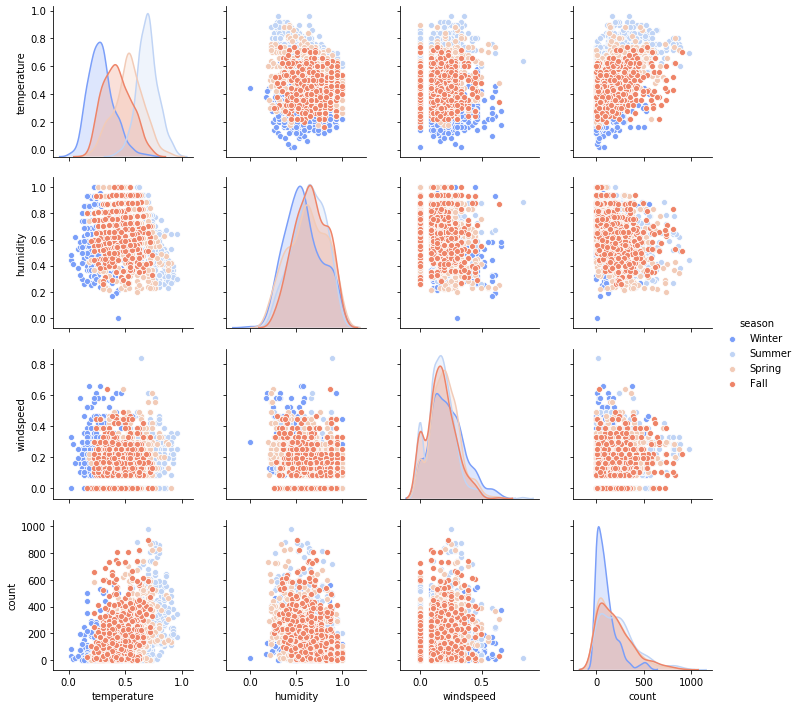

In [151]:
# Numeric data correlation with count, coloured by season
sns.pairplot(bike_sample,hue='season',palette='coolwarm')

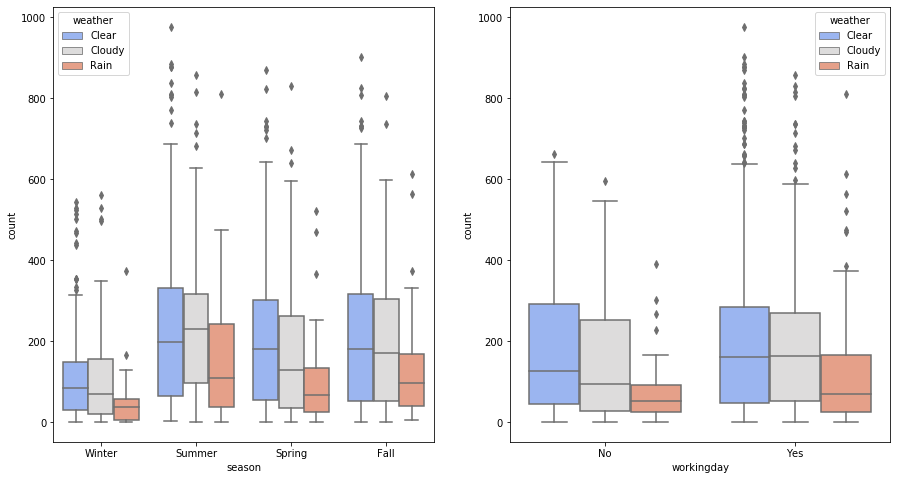

In [99]:
# Categorical data distribution for seasons and working day as per weather conditions
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x='season', y='count', hue='weather',data=bike_sample, palette="coolwarm", ax=ax[0])
sns.boxplot(x='workingday', y='count', hue='weather',data=bike_sample, palette="coolwarm", ax=ax[1])

### Preprocessing: Converting Categorical Data

In [100]:
# convert season to dummy variables
bike_sample = pd.get_dummies(bike_sample, columns=['season'])
# convert working day yes, no to 1, 0 respectively
bike_sample['workingday'] = bike_sample['workingday'].map({'Yes':1,'No':0})
# convert weather to orderinal numbers as per severity
bike_sample['weather'] = bike_sample['weather'].map({'Clear':1, 'Cloudy':2, 'Rain':3, 'Storm':4})
# push count to end
bike_sample = bike_sample[[c for c in bike_sample if c not in ['count']] + ['count']]

In [101]:
#bike_sample.shape               # column row count
#bike_sample.head()              # data peak
#bike_sample.describe()          # statistic details
bike_sample.info()              # column list
#bike_sample.isna().any()        # check NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 10148 to 15268
Data columns (total 10 columns):
workingday       1738 non-null int64
weather          1738 non-null int64
temperature      1738 non-null float64
humidity         1738 non-null float64
windspeed        1738 non-null float64
season_Fall      1738 non-null uint8
season_Spring    1738 non-null uint8
season_Summer    1738 non-null uint8
season_Winter    1738 non-null uint8
count            1738 non-null int64
dtypes: float64(3), int64(3), uint8(4)
memory usage: 181.8 KB


### EOF

In [102]:
# export processed sample set
bike_sample.to_csv('input_bike_sample.csv')

In [103]:
# read processed sample set
bike_sample = pd.read_csv("input_bike_sample.csv")
bike_sample = bike_sample.drop(bike_sample.columns[[0]],axis=1)

### Regression: Data Prep

In [104]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [105]:
# split sample data
train , test = train_test_split(bike_sample, test_size = 0.3)
# create train data
x_train = train.drop('count', axis=1)
y_train = train['count']
# create test data
x_test = test.drop('count', axis = 1)
y_test = test['count']
# create x,y
Xs = bike_sample.drop('count', axis=1)
Ys = bike_sample['count']

In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the features
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [107]:
all_models = {'Model':[],'Cross Validation Score':[]}

### Regression: KNN Regressor

In [108]:
rmse_val = []                                                # to store rmse values for different k
train_score_array = []
test_score_array = []
for K in range(1,20):
    knn_R = KNeighborsRegressor(K)
    knn_R.fit(x_train, y_train)                               # fit the model

    pred=knn_R.predict(x_test)                                # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred))             # calculate rmse
    rmse_val.append(error)                                    # store rmse values

    train_score_array.append(knn_R.score(x_train, y_train))   # calc train score
    test_score_array.append(knn_R.score(x_test, y_test))      # calc test score

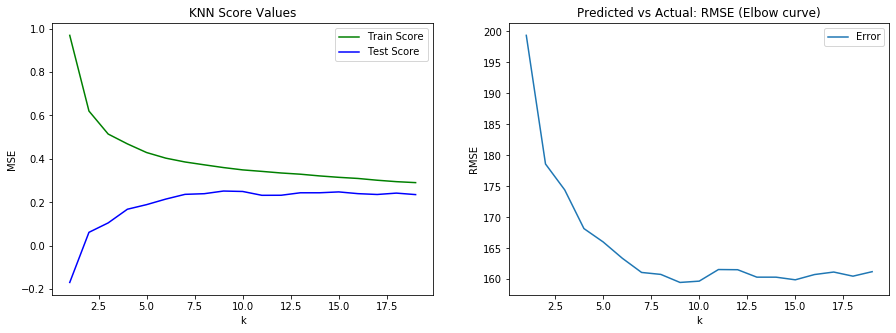

In [109]:
# plotting KNN score values and Elbow curve
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
        plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
        plt.legend()
        plt.xlabel('k')
        plt.ylabel('MSE')
        plt.title('KNN Score Values')
    if i == 2:
        plt.plot(x_axis,rmse_val, label='Error')
        plt.legend()
        plt.xlabel('k')
        plt.ylabel('RMSE')
        plt.title('Predicted vs Actual: RMSE (Elbow curve)')

### Regression: KNN Regressor: GridSearchCV

In [110]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knn_R = KNeighborsRegressor()

best_KnnR = GridSearchCV(knn_R, params, cv=5)
best_KnnR.fit(x_train,y_train)
k = best_KnnR.best_params_['n_neighbors']

all_models['Model'].append('KNN Regression')
all_models['Cross Validation Score'].append(best_KnnR.best_score_)

In [111]:
print('KNN Regression')
print('Best K: %d' % k)
print('Train Score: %.4f' % best_KnnR.score(x_train, y_train))
print('Test Score: %.4f' % best_KnnR.score(x_test, y_test))
print('Cross Validation Score: %.4f' % best_KnnR.best_score_)

KNN Regression
Best K: 10
Train Score: 0.3493
Test Score: 0.2499
Cross Validation Score: 0.2018


### Regression: KNN Regressor: Cross Validation

In [112]:
MSEs = cross_val_score(knn_R, Xs, Ys, cv=5)
mean_MSE = np.mean(MSEs)
print('Average Cross Validation Score: %.4f' % mean_MSE)

Average Cross Validation Score: 0.1367


### Regression: Linear Regression

In [113]:
# linear regression on all attributes
lin_R = LinearRegression()
lin_R.fit(x_train, y_train)
print('Train Score: %.4f' % lin_R.score(x_train, y_train))
print('Test Score: %.4f' %lin_R.score(x_test, y_test))
print('Linear Regression Equation:')
print('count')
print('= %.4f' % lin_R.intercept_)
for i in range(len(lin_R.coef_)):
    print(' + %.4f * ' % lin_R.coef_[i] + bike_sample.columns[i])

Train Score: 0.2663
Test Score: 0.2476
Linear Regression Equation:
count
= 144.3591
 + 4.7619 * workingday
 + 19.2064 * weather
 + 383.2373 * temperature
 + -268.2380 * humidity
 + 39.9336 * windspeed
 + 53.0206 * season_Fall
 + -6.8246 * season_Spring
 + -38.5213 * season_Summer
 + -7.6747 * season_Winter


Count vs Temperature: Linear Regression
count = 17.2932 + 331.6750 * temperature


Text(0.5, 0, 'Temperature')

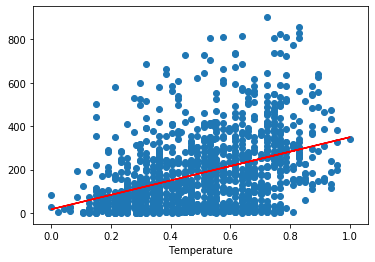

In [114]:
# linear model for temperature vs count
x_train_temp = x_train[[2]]
lin_R_temp = LinearRegression()
lin_R_temp.fit(x_train_temp, y_train)
y_predict = lin_R_temp.predict(x_train_temp)
# equation
print('Count vs Temperature: Linear Regression')
print('count = %.4f + %.4f * temperature' % (lin_R_temp.intercept_,lin_R_temp.coef_))
# linear plot
plt.plot(x_train_temp, y_predict, c = 'r')
plt.scatter(x_train_temp,y_train)
plt.xlabel('Temperature')

### Regression: Linear: Grid Search & Cross Validation

In [115]:
lin_R = LinearRegression()
parameters = {'normalize':[True,False]}

# grid search
best_linR = GridSearchCV(lin_R,parameters, cv=6, return_train_score=True)
best_linR.fit(x_train, y_train)
print("Best parameters: {}".format(best_linR.best_params_))
print("Best cross-validation score: {:.4f}".format(best_linR.best_score_))
all_models['Model'].append('Linear Regression')
all_models['Cross Validation Score'].append(best_linR.best_score_)

# cross validation
MSEs = cross_val_score(lin_R, Xs, Ys, cv=5)
mean_MSE = np.mean(MSEs)
print('Average Cross Validation Score: %.4f' % mean_MSE)

Best parameters: {'normalize': False}
Best cross-validation score: 0.2393
Average Cross Validation Score: 0.2483


### Regression: Ridge

In [116]:
x_range0 = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

# check ridge scores for different values of alpha

for alpha in x_range0: 
    rid_R = Ridge(alpha)
    rid_R.fit(x_train,y_train)
    train_score_list.append(rid_R.score(x_train,y_train))
    test_score_list.append(rid_R.score(x_test, y_test))

In [117]:
x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

# feature response to varying alpha

for alpha in x_range: 
    rid_R = Ridge(alpha)
    rid_R.fit(x_train,y_train)
    coeff.append(rid_R.coef_ )
    
coeff = np.array(coeff)

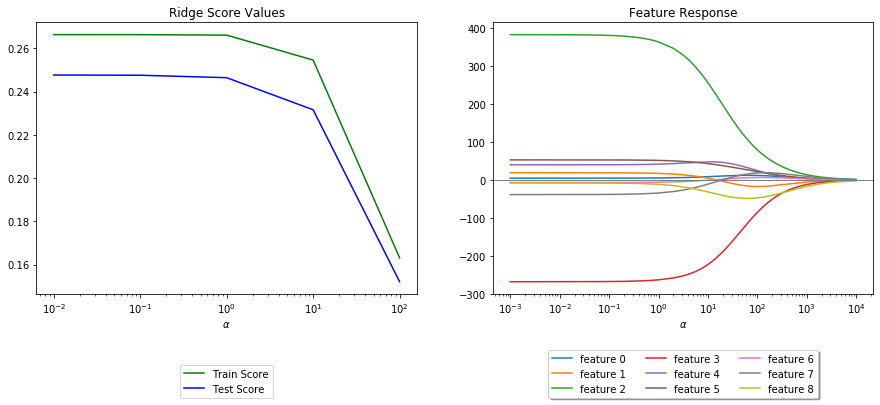

In [118]:
# plotting Ridge score values and Feature response

fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_range0, train_score_list, c = 'g', label = 'Train Score')
        plt.plot(x_range0, test_score_list, c = 'b', label = 'Test Score')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
        plt.xlabel(r'$\alpha$')
        plt.title('Ridge Score Values')
    if i == 2:
        for i in range(0,9):
            plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
        plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
        plt.xlabel(r'$\alpha$')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fancybox=True, shadow=True)
        plt.title('Feature Response')

### Regression: Ridge: GridSearchCV & Cross Validation

In [119]:
rid_R = Ridge()
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
best_ridR = GridSearchCV(rid_R, params, cv=5)
best_ridR.fit(Xs, Ys)
print('Best Alpha: %.3f' % best_ridR.best_params_['alpha'])
print('Best Score: %.4f' % best_ridR.best_score_)
all_models['Model'].append('Ridge Regression')
all_models['Cross Validation Score'].append(best_ridR.best_score_)

Best Alpha: 0.100
Best Score: 0.2483


### Regression: Lasso

In [120]:
x_range0 = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

# check ridge scores for different values of alpha

for alpha in x_range0: 
    las_R = Lasso(alpha)
    las_R.fit(x_train,y_train)
    train_score_list.append(las_R.score(x_train,y_train))
    test_score_list.append(las_R.score(x_test, y_test))

In [121]:
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

# feature response to varying alpha

for alpha in x_range: 
    las_R = Lasso(alpha)
    las_R.fit(x_train,y_train)
    coeff.append(las_R.coef_ )

coeff = np.array(coeff)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833379.9047485292, tolerance: 3594.7872421052634
  positive)


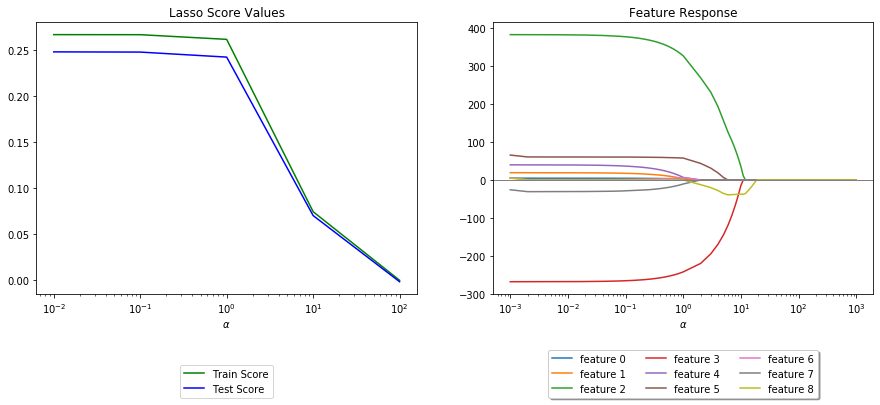

In [122]:
# plotting Lasso score values and Feature response

fig, ax = plt.subplots(1,2,figsize=(15,5))
x_axis = range(1,20)
for i in range(1, 3):
    plt.subplot(1, 2, i)
    if i == 1:
        plt.plot(x_range0, train_score_list, c = 'g', label = 'Train Score')
        plt.plot(x_range0, test_score_list, c = 'b', label = 'Test Score')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
        plt.xlabel(r'$\alpha$')
        plt.title('Lasso Score Values')
    if i == 2:
        for i in range(0,9):
            plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
        plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
        plt.xlabel(r'$\alpha$')
        plt.xscale('log')
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fancybox=True, shadow=True)
        plt.title('Feature Response')

### Regression: Lasso: GridSearchCV & Cross Validation

In [123]:
las_R = Lasso()
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
best_lasR = GridSearchCV(las_R, params, cv=5)
best_lasR.fit(Xs, Ys)
print('Best Alpha: %.3f' % best_lasR.best_params_['alpha'])
print('Best Score: %.4f' % best_lasR.best_score_)
all_models['Model'].append('Lasso Regression')
all_models['Cross Validation Score'].append(best_lasR.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920421.1732324362, tolerance: 4228.160381007195
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932764.5161882192, tolerance: 4143.8041234532375
  positive)


Best Alpha: 0.100
Best Score: 0.2484


### Regression: Polynomial Regression
#### (with GridSearchCV & Cross Validation)

In [124]:
#apply polynomial regression in pipeline
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())  
])

# grid search till degree 5
param_poly = {'polynomialfeatures__degree':range(1,5)}
best_polR = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True)
best_polR.fit(x_train, y_train)
all_models['Model'].append('Polynomial Regression')
all_models['Cross Validation Score'].append(best_polR.best_score_)

# model predictions
y_train_pred = best_polR.predict(x_train)
y_test_pred = best_polR.predict(x_test)

In [125]:
# check model performance:
print('Train:')
print('MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_train, y_train_pred))))
print('R2: {}'.format(r2_score(y_train, y_train_pred)))
print('Test')
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE: {}'.format(sqrt(mean_squared_error(y_test, y_test_pred))))
print('R2: {}'.format(r2_score(y_test, y_test_pred)))
# find best parameters
print('Best parameters: ')
print(best_polR.best_params_)
# cross validation
print("Cross Validation training results", best_polR.cv_results_['mean_train_score'])
print("Cross Validation testing results", best_polR.cv_results_['mean_test_score'])

Train:
MSE: 20325.703235074092
RMSE: 142.56824062558286
R2: 0.3124473447453513
Test
MSE: 25498.791995812193
RMSE: 159.68341177408564
R2: 0.2500763026052589
Best parameters: 
{'polynomialfeatures__degree': 2}
Cross Validation training results [0.26728211 0.31688802 0.35854923 0.3789155 ]
Cross Validation testing results [ 0.25593245  0.25867117  0.1579373  -1.1476894 ]


### Regression: SVM: Simple
#### ( with GridSearchCV & Cross Validation) 

In [126]:
parms_svr = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

# grid search for best parameters
svr_R = LinearSVR()
best_svrR = GridSearchCV(estimator = svr_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1, cv=10)
best_svrR.fit(x_train, y_train)
result_svr = pd.DataFrame(best_svrR.cv_results_)
all_models['Model'].append('Simple SVR Regression')
all_models['Cross Validation Score'].append(best_svrR.best_score_)

# simple SVM with best parameters
svr_R = LinearSVR(C = best_svrR.best_params_['C'], epsilon = best_svrR.best_params_['epsilon'])
svr_R.fit(x_train, y_train)

# cross validation matrix
kfold = KFold(n_splits=10)
scores = cross_val_score(svr_R, x_train, y_train, cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
print('Best Model:')
print('Parameters: {}'.format(best_svrR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrR.best_score_))
print('Train Score: %.4f' % svr_R.score(x_train, y_train))
print('Test Score: %.4f' % svr_R.score(x_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 100, 'epsilon': 100}
Cross-validation score: 0.2367
Train Score: 0.2532
Test Score: 0.2226
Average Cross Validation: 0.2364


Text(0.5, 0, 'Alpha')

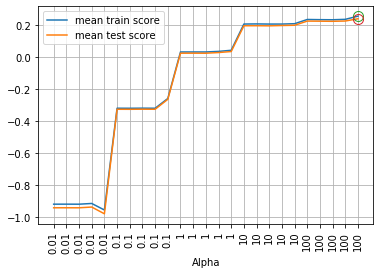

In [128]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrR.best_index_], result_svr['mean_train_score'][best_svrR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrR.best_index_], result_svr['mean_test_score'][best_svrR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Regression: SVM: Linear
#### ( with GridSearchCV & Cross Validation)

In [129]:
parms_svr = {'C': [0.01,0.1, 1, 10, 100]}

# grid search for best parameters
svrL_R = SVR(kernel='linear')
best_svrLR = GridSearchCV(estimator = svrL_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=6)
best_svrLR.fit(x_train,y_train)
result_svr = pd.DataFrame(best_svrLR.cv_results_)
all_models['Model'].append('Linear SVR Regression')
all_models['Cross Validation Score'].append(best_svrLR.best_score_)

# simple SVM with best parameters
svrL_R = SVR(kernel = 'linear',C = best_svrLR.best_params_['C'])
svrL_R.fit(x_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrL_R, x_train, y_train, cv=kfold)

In [130]:
print('Best Model:')
print('Parameters: {}'.format(best_svrLR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrLR.best_score_))
print('Train Score: %.4f' % svrL_R.score(x_train, y_train))
print('Test Score: %.4f' % svrL_R.score(x_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 100}
Cross-validation score: 0.2145
Train Score: 0.2298
Test Score: 0.2054
Average Cross Validation: 0.2145


Text(0.5, 0, 'C')

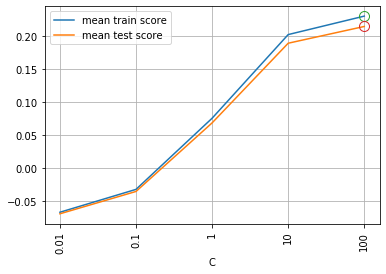

In [131]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrLR.best_index_], result_svr['mean_train_score'][best_svrLR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrLR.best_index_], result_svr['mean_test_score'][best_svrLR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### Regression: SVM: RBF
#### (with GridSearchCV & Cross Validation)

In [132]:
parms_svr = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

# grid search for best parameters
svrR_R = SVR(kernel='rbf')
best_svrRR = GridSearchCV(estimator = svrR_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=3)
best_svrRR.fit(x_train,y_train)
result_svr = pd.DataFrame(best_svrRR.cv_results_)
all_models['Model'].append('RBF SVR Regression')
all_models['Cross Validation Score'].append(best_svrRR.best_score_)

# simple SVM with best parameters
svrR_R = SVR(kernel = 'rbf',C = best_svrRR.best_params_['C'], gamma = best_svrRR.best_params_['gamma'])
svrR_R.fit(x_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrR_R, x_train, y_train, cv=kfold)

In [133]:
print('Best Model:')
print('Parameters: {}'.format(best_svrRR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrRR.best_score_))
print('Train Score: %.4f' % svrR_R.score(x_train, y_train))
print('Test Score: %.4f' % svrR_R.score(x_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 100, 'gamma': 1}
Cross-validation score: 0.2323
Train Score: 0.2913
Test Score: 0.2059
Average Cross Validation: 0.2313


Text(0.5, 0, 'C')

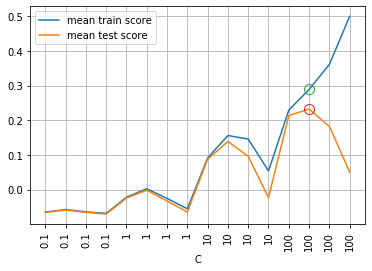

In [134]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrRR.best_index_], result_svr['mean_train_score'][best_svrRR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrRR.best_index_], result_svr['mean_test_score'][best_svrRR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### Regression: SVM: Poly
#### (with GridSearchCV & Cross Validation)

In [135]:
parms_svr = {'C': [1, 10, 100,1000,10000],'degree':[1,3]}

# grid search for best parameters
svrP_R = SVR(kernel='poly')
best_svrPR = GridSearchCV(estimator = svrP_R, param_grid = parms_svr, return_train_score=True, n_jobs= -1,cv=3)
best_svrPR.fit(x_train,y_train)
result_svr = pd.DataFrame(best_svrPR.cv_results_)
all_models['Model'].append('Poly SVR Regression')
all_models['Cross Validation Score'].append(best_svrPR.best_score_)

# simple SVM with best parameters
svrP_R = SVR(kernel = 'linear',C = best_svrPR.best_params_['C'])
svrP_R.fit(x_train, y_train)

# cross validation matrix
kfold = KFold(n_splits = 6)
scores = cross_val_score(svrP_R, x_train, y_train, cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [136]:
print('Best Model:')
print('Parameters: {}'.format(best_svrPR.best_params_))
print('Cross-validation score: {:.4f}'.format(best_svrPR.best_score_))
print('Train Score: %.4f' % svrP_R.score(x_train, y_train))
print('Test Score: %.4f' % svrP_R.score(x_test, y_test))
print('Average Cross Validation: %.4f' % np.mean(scores))

Best Model:
Parameters: {'C': 10000, 'degree': 3}
Cross-validation score: 0.2322
Train Score: 0.2314
Test Score: 0.2076
Average Cross Validation: 0.2137


Text(0.5, 0, 'C')

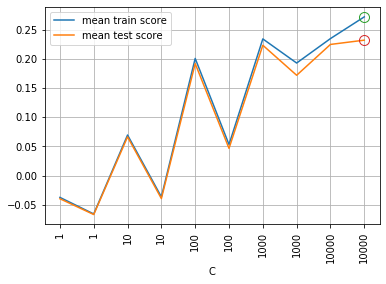

In [137]:
plt.plot(range(result_svr.shape[0]), result_svr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr.shape[0]), result_svr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr.shape[0]), result_svr['param_C'], rotation = 90)
plt.plot([best_svrPR.best_index_], result_svr['mean_train_score'][best_svrPR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([best_svrPR.best_index_], result_svr['mean_test_score'][best_svrPR.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### Best Model: Selection

In [138]:
pd.DataFrame(data = all_models)

,Model,Cross Validation Score
0,KNN Regression,0.201753
1,Linear Regression,0.239268
2,Ridge Regression,0.248328
3,Lasso Regression,0.248407
4,Polynomial Regression,0.258671
5,Simple SVR Regression,0.236668
6,Linear SVR Regression,0.214487
7,RBF SVR Regression,0.232311
8,Poly SVR Regression,0.232200


In [139]:
# selecting lasso for all redictions
y_pred = best_lasR.predict(Xs)

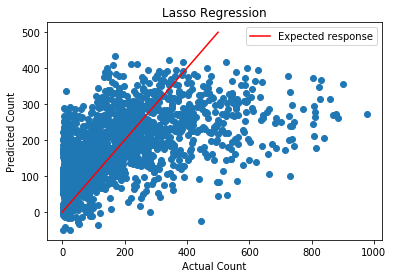

In [502]:
# plot predicted vs actual values
plt.scatter(Ys, y_pred)
plt.title('Lasso Regression')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.plot([0, 500], [0, 500], 'red', label = 'Expected response')
plt.legend()